In [1]:
import numpy as np
import pandas as pd
import os


# List all files in the directory
# files = os.listdir(directory)
for dirname, _, filenames in os.walk('D:/femilas/Ramya--/Dataset'):          # Replace with the path to your directory
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:/femilas/Ramya--/Dataset\Remya.rar
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_55.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_56.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_57.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_58.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_59.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_60.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_61.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_62.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_63.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_64.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_65.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_66.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_67.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_68.jpg
D:/femilas/Ramya--/Dataset\ramya dataset\testing\IDRiD_69.jpg
D:/femilas/Ramya--/Dataset\ramya 

In [33]:
import glob
import cv2
import os
images_t = glob.glob("D:/femilas/Ramya--/Dataset/Remya/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/*.jpg")
images_t.sort()
images_v = glob.glob("D:/femilas/Ramya--/Dataset/Remya/A.%20Segmentation/A. Segmentation/1. Original Images/b. Testing Set/*.jpg")
images_v.sort()
masks_t = glob.glob("D:/femilas/Ramya--/Dataset/Remya/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc/*.tif")
masks_t.sort()
masks_v = glob.glob("D:/femilas/Ramya--/Dataset/Remya/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/5. Optic Disc/*.tif")
masks_v.sort()
print(len(images_t))
print(len(images_v))
print(len(masks_t))
print(len(masks_v))

54
27
54
27


In [34]:
###preprocessing-weignerfilter
import cv2
import os
import shutil
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.fft import fft2, ifft2
# from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import cv2
import numpy as np
from numpy.fft import fft2, ifft2

import cv2
import numpy as np
from numpy.fft import fft2, ifft2

def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s=img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

# Preprocessing parameters
kernel_size = 3
K = 0.01

# Define the Gaussian kernel
def gaussian_kernel(kernel_size):
    h = np.ones((kernel_size, kernel_size)) / kernel_size**2
    return h

# Generate the Gaussian kernel
kernel = gaussian_kernel(kernel_size)

In [35]:
# Iterate over each image in the training set
for image_path in images_t:
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Wiener filter
    preprocessed_image = wiener_filter(image, kernel, K)

#     # Save the preprocessed image
#     output_path = "D:/femilas/Ramya--/Dataset/preprocessed training image"  # Replace with the desired output path
#     filename = os.path.basename(image_path)
#     output_file_path = os.path.join(output_path, filename)
#     cv2.imwrite(output_file_path, preprocessed_image)


In [36]:
# Iterate over each image in the validation set
for image_path in images_v:
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Wiener filter
    preprocessed_image = wiener_filter(image, kernel, K)

    # Save the preprocessed image
#     output_path = "D:/femilas/Ramya--/Dataset/preprocessed testing image"  # Replace with the desired output path
#     filename = os.path.basename(image_path)
#     output_file_path = os.path.join(output_path, filename)
#     cv2.imwrite(output_file_path, preprocessed_image)

In [37]:
# Iterate over each mask in the training set
for mask_path in masks_t:
    # Read the mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Apply Wiener filter
    preprocessed_mask = wiener_filter(mask, kernel, K)

    

In [38]:
# Iterate over each mask in the validation set
for mask_path in masks_v:
    # Read the mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Apply Wiener filter
    preprocessed_mask = wiener_filter(mask, kernel, K)

    

In [39]:
#image_path and mask_path

data = {
    "images": image_path,
    "mask": mask_path,
    "diagnosis": [1 if (np.max(cv2.imread(image_path)) > 0) else 0 for imagepath in mask_path]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head(10)


,images,mask,diagnosis
0,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
1,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
2,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
3,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
4,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
5,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
6,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
7,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
8,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1
9,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,D:/femilas/Ramya--/Dataset/Remya/A.%20Segmenta...,1


In [40]:
from sklearn.model_selection import train_test_split
traindata,testdata=train_test_split(df,test_size=0.1,random_state=42)
traindata,valdata=train_test_split(traindata,test_size=0.2,random_state=42)

In [41]:
print(f"train size is {len(traindata)},val size is {len(valdata)},test size is {len(testdata)}")

train size is 103,val size is 26,test size is 15


In [42]:
def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)


def trainDataGeneration(traindata):
    
    ##Data Augmentation
    image_datagen = ImageDataGenerator(dict(rotation_range=0.2,
                                        rescale=1./255,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest'))
    mask_datagen = ImageDataGenerator(dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest'))

    image_generator = image_datagen.flow_from_dataframe(
    traindata,
    x_col = "images",
    class_mode = None,
    color_mode = "rgb",
    target_size = (256,256),
    batch_size = 32,seed=42
    )
    mask_generator = mask_datagen.flow_from_dataframe(
    traindata,
    x_col = "mask",
    class_mode = None,
    color_mode = "grayscale",
    target_size = (256,256),
    batch_size = 32,seed=42
    )
    for (img, mask) in zip(image_generator, mask_generator):
        img, mask = adjust_data(img, mask)
        yield (img,mask)
        
def testDataGeneration(valdata):
    image_datagen = ImageDataGenerator(dict())
    mask_datagen = ImageDataGenerator(dict())
    image_generator = image_datagen.flow_from_dataframe(
        valdata,
        x_col = "images",
        class_mode = None,
        color_mode = 'rgb',
        target_size = (256,256),
        batch_size = 32,
        seed = 42)

    mask_generator = mask_datagen.flow_from_dataframe(
        valdata,
        x_col = "mask",
        class_mode = None,
        color_mode = "grayscale",
        target_size = (256,256),
        batch_size = 32,
        seed = 42)
    for (img, mask) in zip(image_generator, mask_generator):
        img, mask = adjust_data(img, mask)
        yield (img,mask)

In [1]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K

smooth = 100

# Define your custom loss and metrics functions
def dice_coef(y_true, y_pred):
    y_truef = K.flatten(y_true)
    y_predf = K.flatten(y_pred)
    And = K.sum(y_truef * y_predf)
    return ((2 * And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jac_distance(y_true, y_pred):
    y_truef = K.flatten(y_true)
    y_predf = K.flatten(y_pred)
    return -iou(y_true, y_pred)

# Cocktail Attention block(CAB) 
def CAB(input, reduction):
    _, width, height, channel = input.get_shape()  # (B, W, H, C)

    # Average Pooling
    x_avg = tf.keras.layers.AveragePooling2D(pool_size=(width, height))(input)
    x_avg = tf.keras.layers.Conv2D(channel // reduction, 1, activation=tf.nn.tanh, name='CAB_avg')(x_avg)
    x_avg = tf.keras.layers.UpSampling2D((width, height), interpolation='bilinear')(x_avg)

    # Max Pooling
    x_max = tf.keras.layers.MaxPooling2D(pool_size=(width, height))(input)
    x_max = tf.keras.layers.Conv2D(channel // reduction, 1, activation=tf.nn.tanh, name='CAB_max')(x_max)
    x_max = tf.keras.layers.UpSampling2D((width, height), interpolation='bilinear')(x_max)

    # Shared Convolution
    x_shared = tf.keras.layers.Conv2D(channel // reduction, 1, activation=tf.nn.tanh, name='CAB_shared')(input)

    # Concatenate
    x = tf.keras.layers.concatenate([x_avg, x_max, x_shared], axis=-1)

    # Convolution (7x7)
    x = tf.keras.layers.Conv2D(channel, 7, padding='same', activation=tf.nn.tanh, name='CAB_conv')(x)

    # Squeeze and Excitation (SE) Block
    squeeze = tf.keras.layers.GlobalAveragePooling2D()(x)
    excitation = tf.keras.layers.Dense(channel // reduction, activation=tf.nn.relu)(squeeze)
    excitation = tf.keras.layers.Dense(channel, activation=tf.nn.sigmoid)(excitation)
    excitation = tf.keras.layers.Reshape((1, 1, channel))(excitation)
    x = tf.keras.layers.Multiply()([x, excitation])

    # Convolution (1x1)
    x = tf.keras.layers.Conv2D(channel, 1, activation=tf.nn.tanh, name='CAB_conv1x1')(x)

    return x

# Atrous convolution double residual block (ACDRB)
def ACDRB(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    atrous_conv = Conv2D(64, (3, 3), padding='same', dilation_rate=(2, 2))
    
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    conv = Conv2D(64, (3, 3), padding='same')(conv1)
    bn1 = Activation('relu')(conv)
    atr_con = atrous_conv(bn1)
    conv1 = Conv2D(64, (3, 3), padding='same')(atr_con)
    conv = Conv2D(64, (3, 3), padding='same')(conv1)
    bn1 = BatchNormalization(axis=3)(conv)
    bn1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)
    c = CAB(bn1, 16)

    atrous_conv = Conv2D(128, (3, 3), padding='same', dilation_rate=(2, 2))
    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    conv = Conv2D(128, (3, 3), padding='same')(conv2)
    bn2 = Activation('relu')(conv)
    atr_con = atrous_conv(bn2)
    conv2 = Conv2D(128, (3, 3), padding='same')(atr_con)
    conv = Conv2D(128, (3, 3), padding='same')(conv2)
    bn2 = BatchNormalization(axis=3)(conv)
    bn2 = Activation('relu')(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)
    c1 = CAB(bn2, 16)
    
    atrous_conv = Conv2D(256, (3, 3), padding='same', dilation_rate=(2, 2))
    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    conv = Conv2D(256, (3, 3), padding='same')(conv3)
    bn3 = Activation('relu')(conv)
    atr_con = atrous_conv(bn3)
    conv3 = Conv2D(256, (3, 3), padding='same')(atr_con)
    conv = Conv2D(256, (3, 3), padding='same')(conv3)
    bn3 = BatchNormalization(axis=3)(conv)
    bn3 = Activation('relu')(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)
    c2 = CAB(bn3, 16)
    
    atrous_conv = Conv2D(512, (3, 3), padding='same', dilation_rate=(2, 2))
    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    conv = Conv2D(512, (3, 3), padding='same')(conv4)
    bn4 = Activation('relu')(conv)
    atr_con = atrous_conv(bn4)
    conv4 = Conv2D(512, (3, 3), padding='same')(atr_con)
    conv = Conv2D(512, (3, 3), padding='same')(conv4)
    bn4 = BatchNormalization(axis=3)(conv)
    bn4 = Activation('relu')(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)
    
    atrous_conv = Conv2D(1024, (3, 3), padding='same', dilation_rate=(2, 2))
    conv5 = Conv2D(1024, (3, 3), padding='same')(pool4)
    conv = Conv2D(1024, (3, 3), padding='same')(conv5)
    bn5 = Activation('relu')(conv)
    atr_con = atrous_conv(bn5)
    conv5 = Conv2D(1024, (3, 3), padding='same')(atr_con)
    conv = Conv2D(1024, (3, 3), padding='same')(conv5)
    bn5 = BatchNormalization(axis=3)(conv)
    bn5 = Activation('relu')(bn5)

    # Decoding
    atrous_conv = Conv2D(512, (3, 3), padding='same', dilation_rate=(2, 2))
    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding='same')(up6)
    conv = Conv2D(512, (3, 3), padding='same')(conv6)
    bn6 = Activation('relu')(conv)
    atr_con = atrous_conv(bn6)
    conv6 = Conv2D(512, (3, 3), padding='same')(atr_con)
    conv = Conv2D(512, (3, 3), padding='same')(conv6)
    bn6 = BatchNormalization(axis=3)(conv)
    bn6 = Activation('relu')(bn6)
    
    atrous_conv = Conv2D(256, (3, 3), padding='same', dilation_rate=(2, 2))
    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding='same')(up7)
    conv = Conv2D(256, (3, 3), padding='same')(conv7)
    bn7 = Activation('relu')(conv)
    atr_con = atrous_conv(bn7)
    conv7 = Conv2D(256, (3, 3), padding='same')(atr_con)
    conv = Conv2D(256, (3, 3), padding='same')(conv7)
    bn7 = BatchNormalization(axis=3)(conv)
    bn7 = Activation('relu')(bn7)
    
    atrous_conv = Conv2D(128, (3, 3), padding='same', dilation_rate=(2, 2))
    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding='same')(up8)
    conv = Conv2D(128, (3, 3), padding='same')(conv8)
    bn8 = Activation('relu')(conv)
    atr_con = atrous_conv(bn8)
    conv8 = Conv2D(128, (3, 3), padding='same')(atr_con)
    conv = Conv2D(128, (3, 3), padding='same')(conv8)
    bn8 = BatchNormalization(axis=3)(conv)
    bn8 = Activation('relu')(bn8)
    
    atrous_conv = Conv2D(128, (3, 3), padding='same', dilation_rate=(2, 2))
    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding='same')(up9)
    conv = Conv2D(64, (3, 3), padding='same')(conv9)
    bn9 = Activation('relu')(conv)
    atr_con = atrous_conv(bn9)
    conv9 = Conv2D(64, (3, 3), padding='same')(atr_con)
    conv = Conv2D(64, (3, 3), padding='same')(conv9)
    bn9 = BatchNormalization(axis=3)(conv)
    bn9 = Activation('relu')(bn9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

model = ACDRB(input_size=(256, 256, 3))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d_1[0][0]']               
                                )                                                             

In [44]:
trainingdata = trainDataGeneration(traindata)
validationdata = testDataGeneration(valdata)

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
BATCH_SIZE = 32
epochs = 5
learning_rate = 0.0001
decay_rate = learning_rate / epochs
# Define custom metric functions
def sensitivity(y_true, y_pred):
    true_positives = tf.reduce_sum(y_true * tf.round(y_pred))
    actual_positives = tf.reduce_sum(y_true)
    return true_positives / (actual_positives + tf.keras.backend.epsilon())

def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    true_positives = tf.reduce_sum(y_true * y_pred)
    predicted_positives = tf.reduce_sum(y_pred)
    actual_positives = tf.reduce_sum(y_true)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())
    f1_score = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1_score

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=dice_coef_loss,
              metrics=["binary_accuracy", iou, dice_coef,sensitivity, f1_score])

callbacks = [ModelCheckpoint('brainSeg_best.h5', verbose=1, save_best_only=True)]

history = model.fit(trainingdata,
                    epochs=epochs,
                    steps_per_epoch=10,
                    validation_data=validationdata,
                    validation_steps=10,
                    callbacks=callbacks)


Found 103 validated image filenames.
Found 103 validated image filenames.
Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: -1.2060e-04 - binary_accuracy: 0.6017 - iou: 1.7445e-04 - dice_coef: 1.7445e-04 - sensitivity: 0.0000e+00 - f1_score: 0.0000e+00  Found 26 validated image filenames.
Found 26 validated image filenames.

Epoch 1: val_loss improved from inf to -0.00012, saving model to brainSeg_best.h5
10/10 [==============================] - 1267s 125s/step - loss: -1.2060e-04 - binary_accuracy: 0.6017 - iou: 1.7445e-04 - dice_coef: 1.7445e-04 - sensitivity: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: -1.1785e-04 - val_binary_accuracy: 0.8344 - val_iou: 1.1785e-04 - val_dice_coef: 1.1785e-04 - val_sensitivity: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: -1.5118e-04 - binary_accuracy: 0.7542 - iou: 2.4111e-04 - dice_coef: 2.4111e-04 - sensitivity: 0.0000e+00 - f1_score: 0.0000e+00  
Epoch 2: val_loss imp

1/1 [==============================] - 2s 2s/step


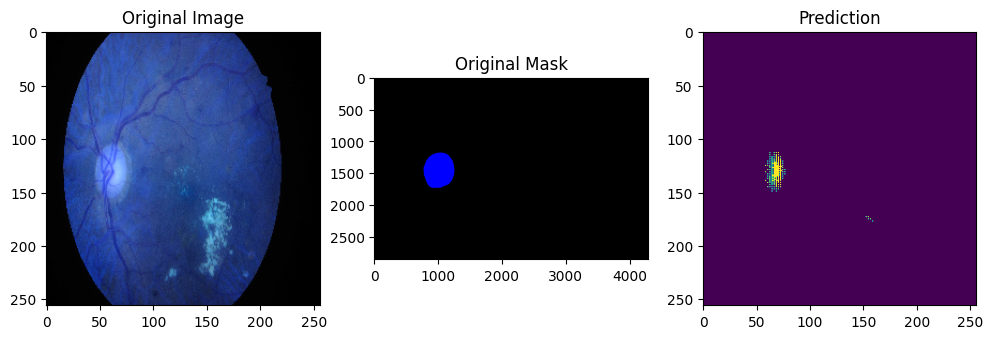

1/1 [==============================] - 1s 922ms/step


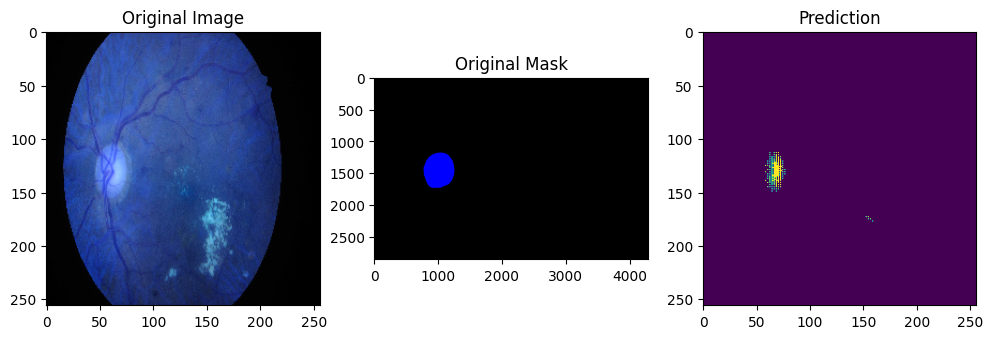

1/1 [==============================] - 1s 959ms/step


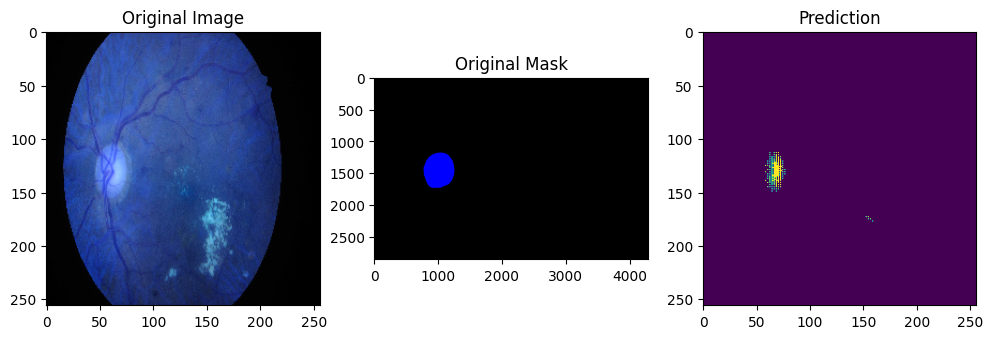

1/1 [==============================] - 1s 899ms/step


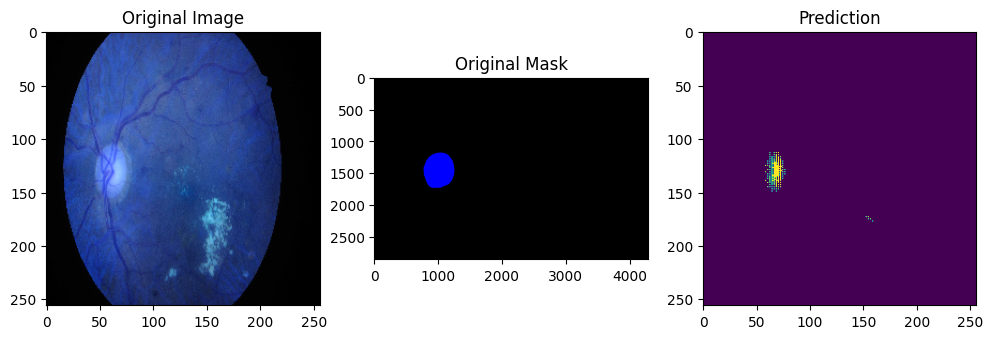

1/1 [==============================] - 1s 889ms/step


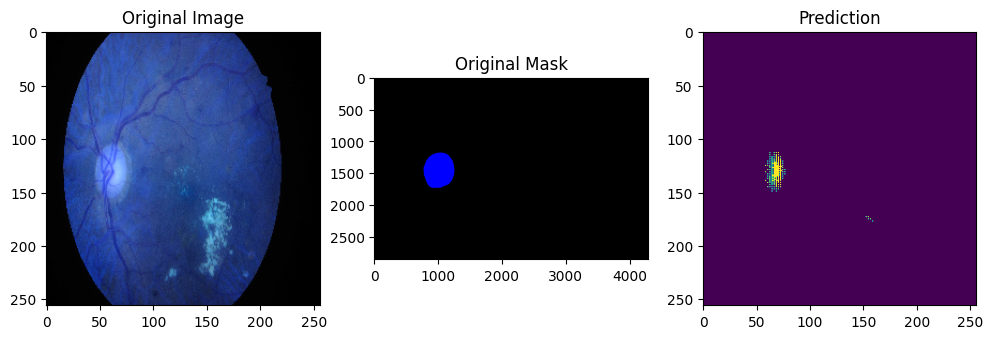

In [46]:
for loop in range(5):
    index=np.random.randint(1,len(testdata.index))
    img = cv2.imread(testdata['images'].iloc[index])
    img = cv2.resize(img ,(256, 256))
    img = img / 255
    img=np.expand_dims(img, axis=0)
    pred=model.predict(img)
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(testdata['mask'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()

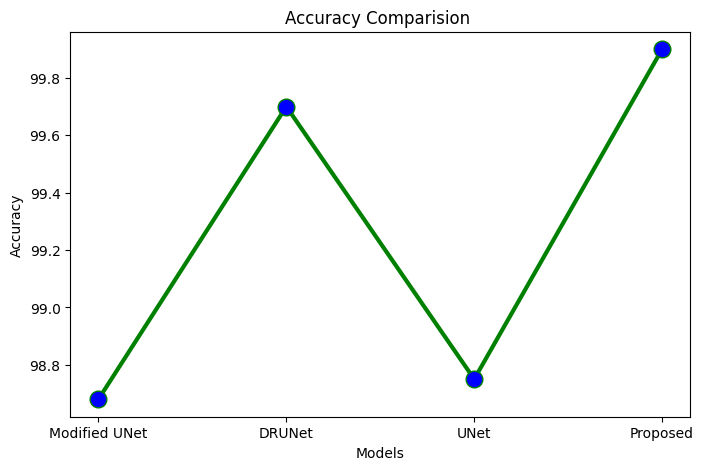

In [84]:
######## -------------- Graph for Accuracy --------------#########

from matplotlib import pyplot as plt
# x axis values
x = ['CNN_UNet','DRUNet','UNet','Proposed']
# corresponding y axis values
y = [98.68,99.7,98.75,99.9 ]
fig = plt.figure(figsize=(8, 5))
# plotting the points
plt.plot(x, y, color='green', linestyle='-', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=12)


# naming the x axis
plt.xlabel('Models')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy Comparision ')
# plt.savefig('Rec_Comp.png')
# function to show the plot
plt.show()



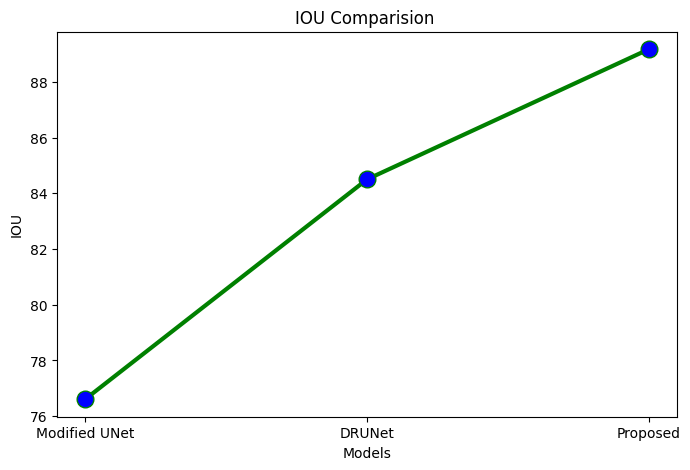

In [85]:
######## -------------- Graph for IOU --------------#########

from matplotlib import pyplot as plt
# x axis values
x = ['CNN_UNet','DRUNet','Proposed']
# corresponding y axis values
y = [76.61,84.5,89.17 ]
fig = plt.figure(figsize=(8, 5))
# plotting the points
plt.plot(x, y, color='green', linestyle='-', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=12)


# naming the x axis
plt.xlabel('Models')
# naming the y axis
plt.ylabel('IOU')

# giving a title to my graph
plt.title('IOU Comparision ')
# plt.savefig('Rec_Comp.png')
# function to show the plot
plt.show()


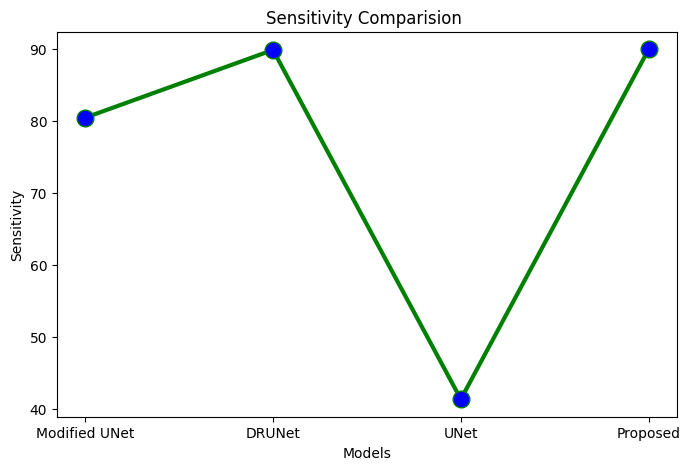

In [86]:
######## -------------- Graph for Sensitivity --------------#########

from matplotlib import pyplot as plt
# x axis values
x = ['CNN_UNet','DRUNet','UNet','Proposed']
# corresponding y axis values
y = [80.49,89.9,41.41,90 ]
fig = plt.figure(figsize=(8, 5))
# plotting the points
plt.plot(x, y, color='green', linestyle='-', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=12)


# naming the x axis
plt.xlabel('Models')
# naming the y axis
plt.ylabel('Sensitivity')

# giving a title to my graph
plt.title('Sensitivity Comparision ')
# plt.savefig('Rec_Comp.png')
# function to show the plot
plt.show()


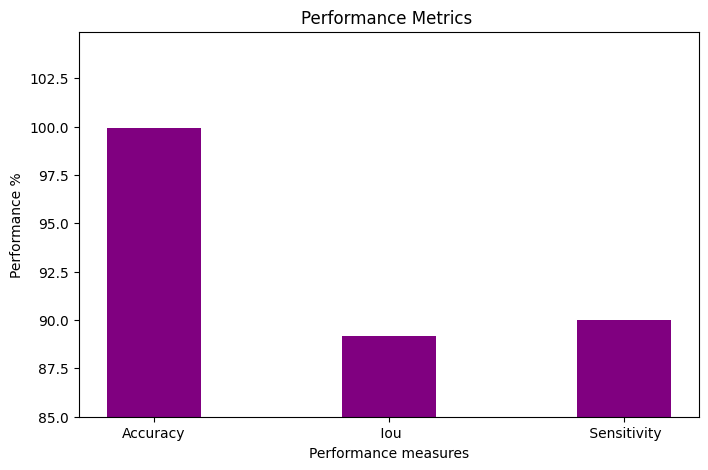

In [87]:
######## -------------- Graph for Performance metrics --------------#########

from matplotlib import pyplot as plt
# x axis values
x = ['Accuracy',  ' Iou', ' Sensitivity']
# corresponding y axis values
y = [ 99.9,89.17,90 ]
fig = plt.figure(figsize=(8, 5))
# plotting the points
plt.bar(x, y, color='purple',width=0.4)
# Set the y-axis limits
plt.ylim(85, max(y) + 5)  # Adjust the upper limit as needed

# naming the x axis
plt.xlabel('Performance measures')
# naming the y axis
plt.ylabel('Performance %')

# giving a title to my graph
plt.title('Performance Metrics ')
# plt.savefig('Perf_met.png')
# function to show the plot
plt.show()
